In [80]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error


In [44]:
train_df = pd.read_csv("I:/train.csv")
test_df = pd.read_csv("I:/test.csv")

In [45]:
train_df.shape

(45593, 20)

In [46]:
train_df.head()

ID Delivery_person_ID Delivery_person_Age Delivery_person_Ratings  \
0  0x4607     INDORES13DEL02                   37                     4.9   
1  0xb379     BANGRES18DEL02                   34                     4.5   
2  0x5d6d     BANGRES19DEL01                   23                     4.4   
3  0x7a6a    COIMBRES13DEL02                   38                     4.7   
4  0x70a2     CHENRES12DEL01                   32                     4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude  Order_Date Time_Orderd Time_Order_picked  \
0                    75.912471  19-03-2022    11:30:00          11:45:00   
1                    77.813237  25-03-2022    19:45:00          19:50:00   
2                    77.688400  19-03-2022    08:30:00          08:45:00   
3                    77.026494  05-04-2022    18:00:00          18:10:00   
4                    80.289982  26-03-2022    13:30:00          13:45:00   

       Weatherconditions Road_traffic_density  Vehicle_condition  \
0       conditions Sunny                High                   2   
1      conditions Stormy                 Jam                   2   
2  conditions Sandstorms                 Low                   0   
3       conditions Sunny              Medium                   0   
4      conditions Cloudy                High                   1   

  Type_of_order Type_of_vehicle multiple_deliveries Festival            City  \
0        Snack      motorcycle                    0      No           Urban    
1        Snack         scooter                    1      No   Metropolitian    
2       Drinks      motorcycle                    1      No           Urban    
3       Buffet      motorcycle                    1      No   Metropolitian    
4        Snack         scooter                    1      No   Metropolitian    

  Time_taken(min)  
0        (min) 24  
1        (min) 33  
2        (min) 26  
3        (min) 21  
4        (min) 30

In [47]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [48]:
train_df.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

In [49]:
train_df.describe()

Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
count         45593.000000          45593.000000                45593.000000   
mean             17.017729             70.231332                   17.465186   
std               8.185109             22.883647                    7.335122   
min             -30.905562            -88.366217                    0.010000   
25%              12.933284             73.170000                   12.988453   
50%              18.546947             75.898497                   18.633934   
75%              22.728163             78.044095                   22.785049   
max              30.914057             88.433452                   31.054057   

       Delivery_location_longitude  Vehicle_condition  
count                 45593.000000       45593.000000  
mean                     70.845702           1.023359  
std                      21.118812           0.839065  
min                       0.010000           0.000000  
25%                      73.280000           0.000000  
50%                      76.002574           1.000000  
75%                      78.107044           2.000000  
max                      88.563452           3.000000

In [50]:
train_df.drop_duplicates(inplace=True)
train_df.fillna(train_df.median(numeric_only=True), inplace=True)


In [51]:
train_df['Delivery_location_latitude'] = train_df['Delivery_location_latitude'].round().astype(int)
print(train_df['Delivery_location_latitude'])


0        23
1        13
2        13
3        11
4        13
         ..
45588    27
45589     0
45590    13
45591    11
45592    23
Name: Delivery_location_latitude, Length: 45593, dtype: int32


In [52]:
train_df['Time_taken(min)'] = train_df['Time_taken(min)'].astype(str).str.extract(r'(\d+)').astype(int)
train_df['Time_taken(min)']


0        24
1        33
2        26
3        21
4        30
         ..
45588    32
45589    36
45590    16
45591    26
45592    36
Name: Time_taken(min), Length: 45593, dtype: int32

In [53]:
train_df['Order_Date'] = pd.to_datetime(train_df['Order_Date'], dayfirst=True)
train_df['Time_Orderd'] = pd.to_datetime(train_df['Time_Orderd'], format='%H:%M:%S', errors='coerce')
train_df['Time_Order_picked'] = pd.to_datetime(train_df['Time_Order_picked'], format='%H:%M:%S', errors='coerce')

In [54]:
train_df['Order_Hour'] = train_df['Time_Orderd'].dt.hour
train_df['Pickup_Hour'] = train_df['Time_Order_picked'].dt.hour


In [55]:
train_df.drop_duplicates(inplace=True)
train_df.dropna(inplace=True)

In [56]:
cat_cols = ['Weatherconditions', 'Road_traffic_density', 'Type_of_order', 
            'Type_of_vehicle', 'Festival', 'City']

In [57]:
for col in cat_cols:
    train_df[col] = train_df[col].str.strip()
    train_df[col] = train_df[col].astype('category')

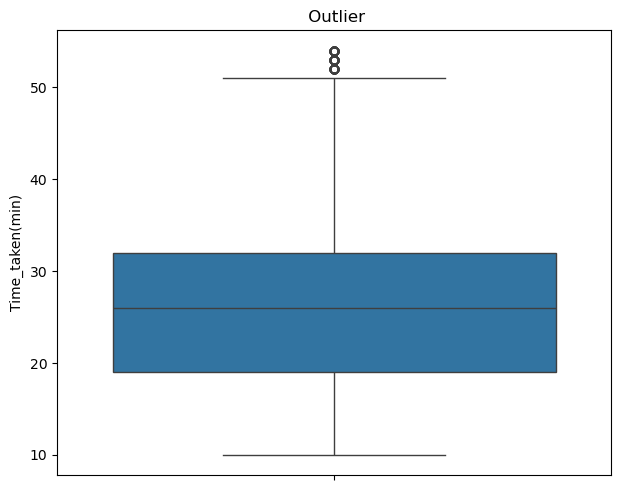

In [58]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=train_df['Time_taken(min)'])
plt.title(" Outlier")
plt.tight_layout()
plt.show()

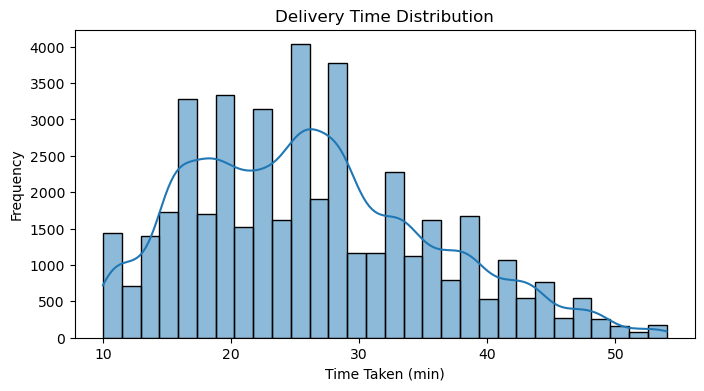

In [59]:
plt.figure(figsize=(8, 4))
sns.histplot(train_df['Time_taken(min)'], kde=True, bins=30)
plt.title("Delivery Time Distribution")
plt.xlabel("Time Taken (min)")
plt.ylabel("Frequency")
plt.show()

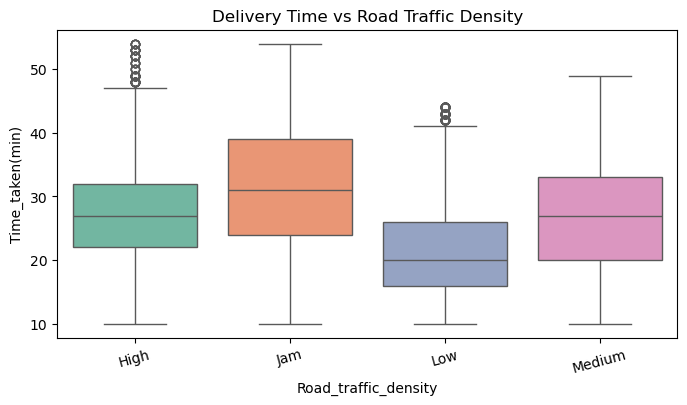

In [60]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=train_df, x='Road_traffic_density', y='Time_taken(min)',hue='Road_traffic_density', palette='Set2', legend=False)
plt.title("Delivery Time vs Road Traffic Density")
plt.xticks(rotation=15)
plt.show()

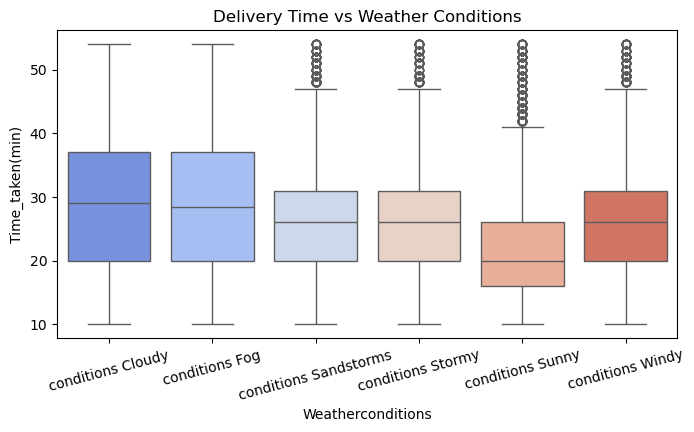

In [61]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=train_df, x='Weatherconditions', y='Time_taken(min)', hue='Weatherconditions', palette='coolwarm', legend=False)
plt.title("Delivery Time vs Road Traffic Density")
plt.title("Delivery Time vs Weather Conditions")
plt.xticks(rotation=15)
plt.show()

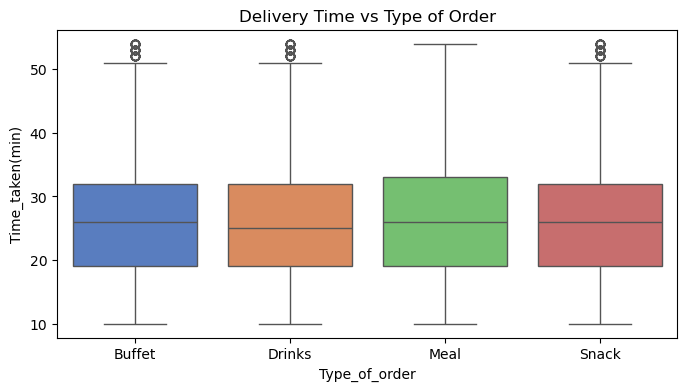

In [62]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=train_df, x='Type_of_order', y='Time_taken(min)',hue='Type_of_order', palette='muted')
plt.title("Delivery Time vs Type of Order")
plt.show()

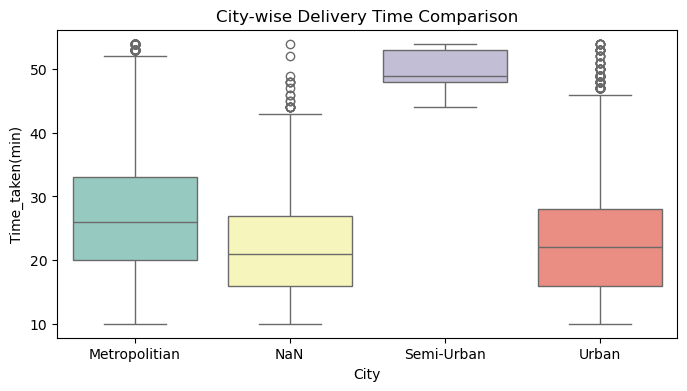

In [63]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=train_df, x='City', y='Time_taken(min)',hue='City', palette='Set3')
plt.title("City-wise Delivery Time Comparison")
plt.show()

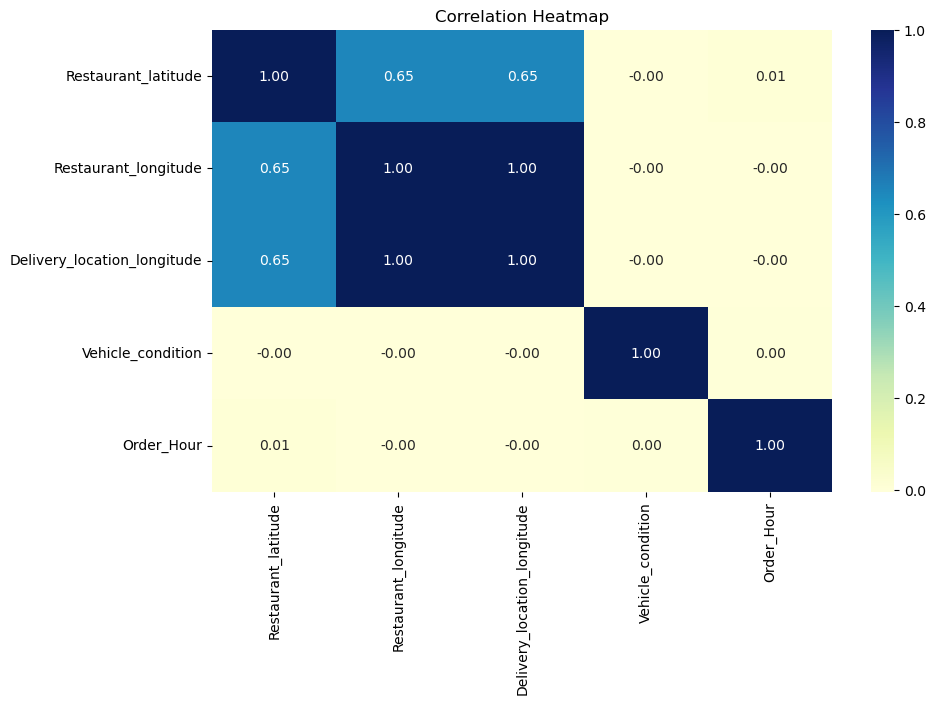

In [64]:
plt.figure(figsize=(10, 6))
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(numerical_cols, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [65]:
def distance(lat1, lon1, lat2, lon2):
    R = 6371  
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    a = np.sin(delta_phi / 2.0)**2 + \
        np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))

    return R * c  


train_df['Distance_km'] = distance(
    train_df['Restaurant_latitude'],
    train_df['Restaurant_longitude'],
    train_df['Delivery_location_latitude'],
    train_df['Delivery_location_longitude']
)


train_df['Order_Pickup_Duration(min)'] = (
    (train_df['Time_Order_picked'] - train_df['Time_Orderd'])
    .dt.total_seconds() / 60
)


train_df['Order_Day'] = train_df['Order_Date'].dt.day_name()


def is_peak(hour):
    if 12 <= hour <= 14 or 19 <= hour <= 21:
        return 1
    return 0

train_df['Is_Peak_Hour'] = train_df['Order_Hour'].apply(is_peak)


In [66]:
train_df.loc[:, 'Distance_km'] = distance(
    train_df['Restaurant_latitude'],
    train_df['Restaurant_longitude'],
    train_df['Delivery_location_latitude'],
    train_df['Delivery_location_longitude']
)

train_df.loc[:, 'Order_Pickup_Duration(min)'] = (
    (train_df['Time_Order_picked'] - train_df['Time_Orderd']).dt.total_seconds() / 60
)

train_df.loc[:, 'Order_Day'] = train_df['Order_Date'].dt.day_name()

train_df.loc[:, 'Is_Peak_Hour'] = train_df['Order_Hour'].apply(is_peak)


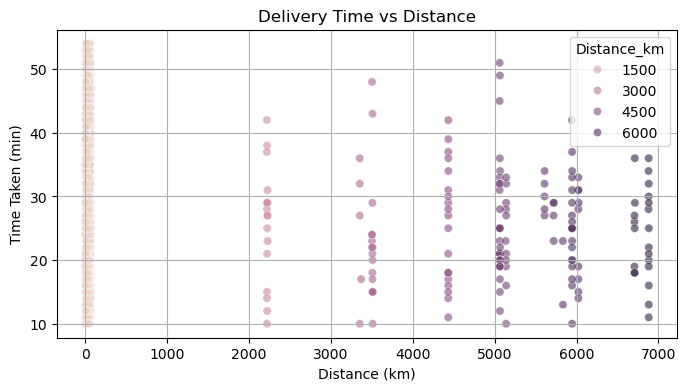

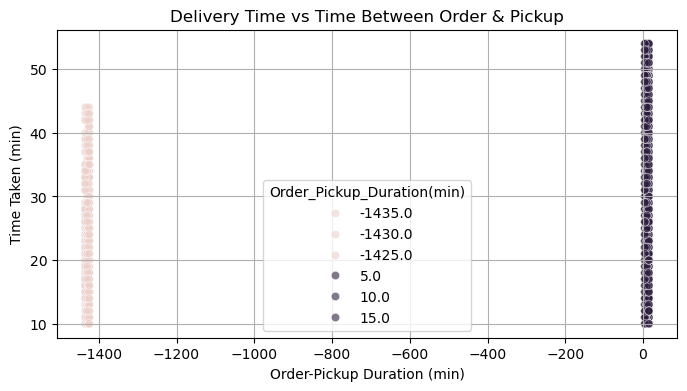

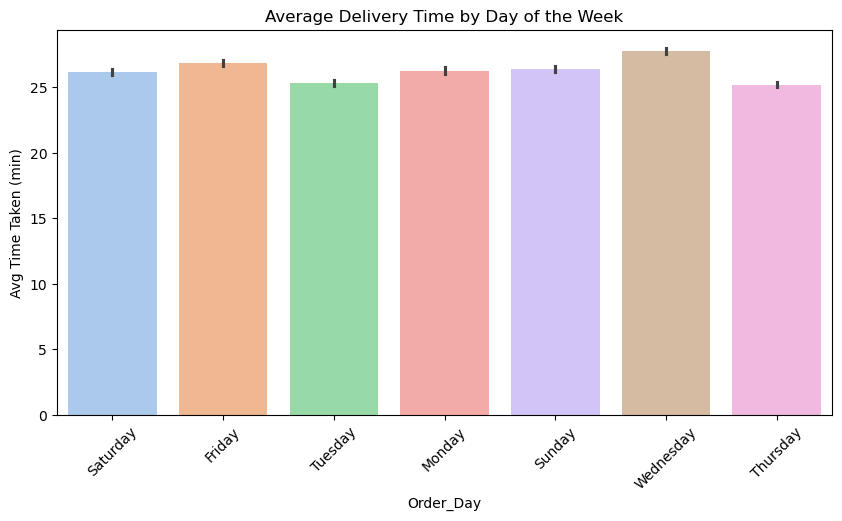

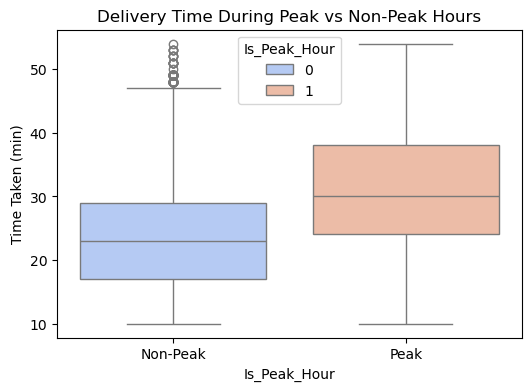

In [67]:


plt.figure(figsize=(8, 4))
sns.scatterplot(data=train_df, x='Distance_km', y='Time_taken(min)',hue='Distance_km', alpha=0.6)
plt.title("Delivery Time vs Distance")
plt.xlabel("Distance (km)")
plt.ylabel("Time Taken (min)")
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 4))
sns.scatterplot(data=train_df, x='Order_Pickup_Duration(min)', y='Time_taken(min)',hue='Order_Pickup_Duration(min)', alpha=0.6, color='orange')
plt.title("Delivery Time vs Time Between Order & Pickup")
plt.xlabel("Order-Pickup Duration (min)")
plt.ylabel("Time Taken (min)")
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
sns.barplot(data=train_df, x='Order_Day', y='Time_taken(min)',hue='Order_Day', palette='pastel', estimator='mean')
plt.title("Average Delivery Time by Day of the Week")
plt.xticks(rotation=45)
plt.ylabel("Avg Time Taken (min)")
plt.show()


plt.figure(figsize=(6, 4))
sns.boxplot(data=train_df, x='Is_Peak_Hour', y='Time_taken(min)',hue='Is_Peak_Hour', palette='coolwarm')
plt.title("Delivery Time During Peak vs Non-Peak Hours")
plt.xticks([0, 1], ['Non-Peak', 'Peak'])
plt.ylabel("Time Taken (min)")
plt.show()


In [68]:
features = ['Distance_km', 'Order_Pickup_Duration(min)', 'Order_Hour', 'Pickup_Hour',
            'Vehicle_condition', 'multiple_deliveries', 'Is_Peak_Hour', 'City', 
            'Type_of_order', 'Type_of_vehicle', 'Road_traffic_density', 'Weatherconditions']

In [77]:
X = train_df[features].copy()
y = train_df['Time_taken(min)'].copy()

for col in X.select_dtypes(include='category').columns:
    X[col] = LabelEncoder().fit_transform(X[col])



In [81]:
model_data = pd.concat([X, y], axis=1).dropna()
X = model_data.drop('Time_taken(min)', axis=1)
y = model_data['Time_taken(min)']


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
models = {
    "Random Forest": RandomForestRegressor(random_state=42)
    
}


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


In [91]:
print(f" {name}")
print("R² Score:", (r2_score(y_test, y_pred)))
print("RMSE:", (mean_squared_error(y_test, y_pred, squared=False)))


 Random Forest
R² Score: 0.4994807121994862
RMSE: 6.626428274968178


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
